# Imports and Defaults

In [1]:
import json
import os
import zipfile

import bridgestan as bs
from cmdstanpy import CmdStanModel
import numpy as np

In [4]:
seed = 1234
rng = np.random.default_rng(seed)

num_chains = 5
num_samples = 100000000

model_name = "funnel10"
model_path = model_name + ".stan"
data_path = model_name + ".json"

# Generate Reference Draws

In [5]:
model = CmdStanModel(stan_file=model_path)
nuts_output = model.sample(
    data=None,
    iter_sampling=num_samples,
    chains=num_chains,
    seed=seed,
    thin=1000,
    adapt_delta=0.95,
)

ref_draws_np = nuts_output.draws()[:, :, 7:] # [draws, chains, params]
# convert dimension order to [chains, draws, params]
ref_draws_np = np.transpose(ref_draws_np, (1, 0, 2))

15:03:54 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

20:38:06 - cmdstanpy - INFO - CmdStan done processing.


20:38:13 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1540 divergent transitions (0.0%)
	Chain 1 had 1244 iterations at max treedepth (0.0%)
	Chain 2 had 378 divergent transitions (0.0%)
	Chain 2 had 536 iterations at max treedepth (0.0%)
	Chain 3 had 152 divergent transitions (0.0%)
	Chain 3 had 1560 iterations at max treedepth (0.0%)
	Chain 4 had 34 divergent transitions (0.0%)
	Chain 4 had 5055 iterations at max treedepth (0.0%)
	Chain 5 had 685 divergent transitions (0.0%)
	Chain 5 had 413 iterations at max treedepth (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [6]:
# convert from numpy 3d array to json format

param_names = [
    "v", "theta[1]", "theta[2]", "theta[3]", "theta[4]", "theta[5]", 
    "theta[6]", "theta[7]", "theta[8]", "theta[9]"
]

ref_draws = []
for chain in ref_draws_np:  # each chain is [n_samples, params_dim]
    chain_dict = {}
    for name, params in zip(param_names, chain.T):
        chain_dict[name] = params.tolist()
    ref_draws.append(chain_dict)

# save to file
with zipfile.ZipFile(f"{model_name}.ref_draws.json.zip", mode="w", compression=zipfile.ZIP_DEFLATED, compresslevel=9) as zip_file: 
    dumped_JSON: str = json.dumps(ref_draws, ensure_ascii=False, indent=4)
    zip_file.writestr(f"{model_name}.ref_draws.json", data=dumped_JSON)

In [15]:
avg = np.mean(ref_draws_np, axis=(0, 1))
avg_squared = np.mean(ref_draws_np ** 2, axis=(0, 1))

print(avg)
print(avg_squared)

[ 0.14746752 -0.01459007 -0.01617681 -0.03103291 -0.01275081 -0.00416501
  0.0024026  -0.00704848  0.00514057 -0.0316727 ]
[  8.14715571  92.6651645   84.07814618 102.3168585   90.45952225
  82.78501964  85.76597462 102.95213108  89.55639543  94.01340356]


# Messing Around

In [6]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [48]:
model = CmdStanModel(stan_file=model_path)
nuts_output = model.sample(
    data=None,
    iter_sampling=1000000, # num_samples,
    chains=num_chains,
    seed=seed,
    thin=10,
    adapt_delta=0.99,
)

ref_draws_np = nuts_output.draws()[:, :, 7:] # [draws, chains, params]

11:18:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

11:22:26 - cmdstanpy - INFO - CmdStan done processing.


11:22:32 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1656 divergent transitions (0.2%)
	Chain 1 had 138 iterations at max treedepth (0.0%)
	Chain 2 had 3069 divergent transitions (0.3%)
	Chain 2 had 247 iterations at max treedepth (0.0%)
	Chain 3 had 156 divergent transitions (0.0%)
	Chain 3 had 5884 iterations at max treedepth (0.6%)
	Chain 4 had 63 divergent transitions (0.0%)
	Chain 4 had 2660 iterations at max treedepth (0.3%)
	Chain 5 had 75 divergent transitions (0.0%)
	Chain 5 had 2744 iterations at max treedepth (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [49]:
v1 = ref_draws_np.mean(axis=(0, 1))
v2 = np.square(ref_draws_np).mean(axis=(0, 1))

print(v1)
print(v2)

[ 0.43323471  0.03603538  0.03738338 -0.00658518  0.00470734 -0.02435977
  0.02907866 -0.01422127 -0.02774414  0.04764532]
[  7.49006419  82.8207251  126.98616909  84.33697399  80.98813245
  80.51229333  91.04528211  82.8727097   94.58167167 129.16905908]


In [44]:
v1 = ref_draws_np.mean(axis=(0, 1))
v2 = np.square(ref_draws_np).mean(axis=(0, 1))

print(v1)
print(v2)

[ 0.26265482  0.05815606 -0.01567756 -0.02020245 -0.07218985 -0.05637811
  0.00748403 -0.03356094 -0.01249842  0.00155373]
[  7.61315534  72.40134027  82.53033107  72.31794659  74.81189062
  77.52481398  65.92392995  67.96706224  85.66199092 102.12010162]


/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'NUTS with adapt_delta=0.95')

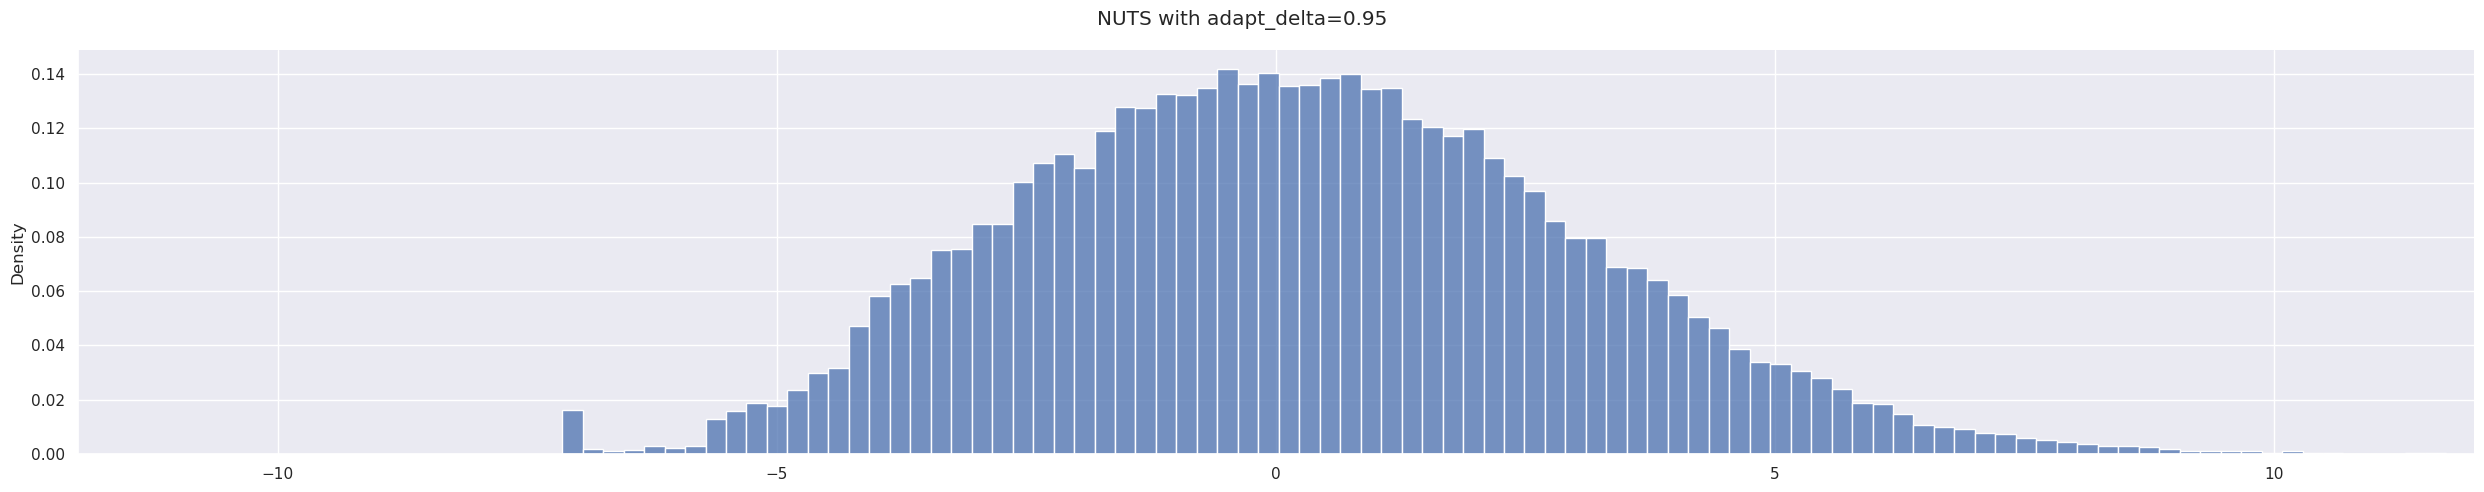

In [45]:
fig = sns.displot(
    x=ref_draws_np[:, :, 0].flatten(), 
    aspect=5,
    stat="density"
)
fig.set(xlim=(-12, 12))
# adjust subplots to make room for title
fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle(f"NUTS with adapt_delta=0.95")